In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data_path = "../../../../../../../Volumes/T7 Shield/preprocessed_exp1"
# data_path = "../../data/preprocessed_new"

# for results,model and scaler
folder_path = "../plots/general"
os.makedirs(folder_path, exist_ok=True)

feature_files = [os.path.join(data_path, f"{i}_features.npy") for i in range(1, 733)]
target_files = [os.path.join(data_path, f"{i}_targets.npy") for i in range(1, 733)]

features = np.stack([np.load(fp) for fp in feature_files])
targets = np.stack([np.load(fp) for fp in target_files])
  

print(targets.shape)
print(features.shape)

# features = ['SST', 'SAL', 'ice_frac', 'mixed_layer_depth', 'heat_flux_down', 'water_flux_up', 'stress_X', 'stress_Y', 'currents_X', 'currents_Y',
#             'month','tmask','year','nav_lat', 'nav_lon','global_co2']
# targets = ['fco2','fco2_pre','co2flux','co2flux_pre']

(732, 167, 360, 4)
(732, 167, 360, 16)


In [14]:
average_SST = []
average_co2_flux_pre = []
average_co2_flux = []

for i in range(0, features.shape[0], 12):
    if i + 12 > features.shape[0]:
        break  # Skip incomplete chunk at the end if it exists

    chunk_f = features[i:i+12]  # shape (12, 167, 360, 16)
    chunk_t = targets[i:i+12]  # shape (12, 167, 360, 4)

    # Create mask where the 11th feature is 1 (shape: 12, 167, 360)
    mask = chunk_f[..., 11] == 1
    filtered_f = chunk_f[mask]
    filtered_t = chunk_t[mask]
    avg = np.mean(filtered_f[:, 0])  # 5th value of feature vector
    average_SST.append(avg)

    avg = np.mean(filtered_t[:, 2])  # 5th value of target vector
    average_co2_flux.append(avg)

    avg = np.mean(filtered_t[:, 3])  # 5th value of feature vector
    average_co2_flux_pre.append(avg)

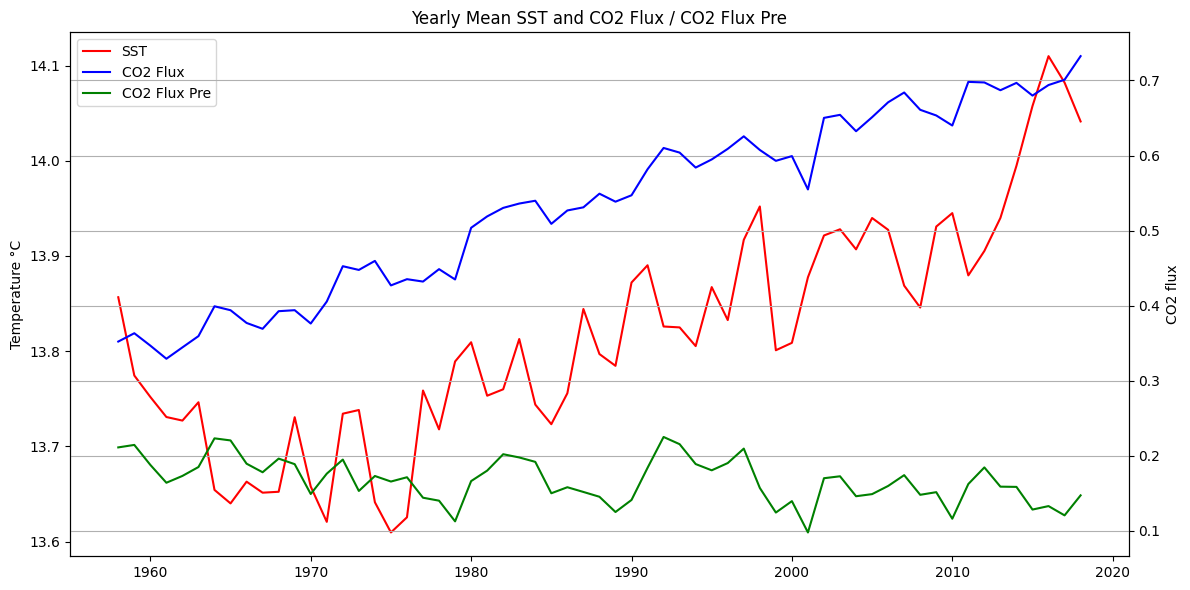

In [23]:
start_year = 1958
years = list(range(start_year, start_year + len(average_SST)))
labels = ['SST', 'CO2 Flux', 'CO2 Flux Pre']

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot first time series on left y-axis
ln1 = ax1.plot(years,  average_SST, label=labels[0], color='red')
ax1.set_ylabel('Temperature °C')
ax1.tick_params(axis='y')

# Plot second time series on right y-axis
ax2 = ax1.twinx()
ln2 = ax2.plot(years, average_co2_flux, label=labels[1],color='blue')
ln3 = ax2.plot(years, average_co2_flux_pre, label=labels[2], color='green')
ax2.set_ylabel('CO2 flux')
ax2.tick_params(axis='y')

lns = ln1 + ln2 + ln3
ax1.legend(lns, labels, loc='upper left')

plt.title("Yearly Mean SST and CO2 Flux / CO2 Flux Pre")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()